In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [11]:
df = pd.read_csv("../datasets/dog-breed-identification/labels.csv")
print(df.head(10))
print(len(df["breed"].unique()))
counts = df["breed"].value_counts()   # index = breed names, values = counts
print(counts)


                                 id               breed
0  000bec180eb18c7604dcecc8fe0dba07         boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97               dingo
2  001cdf01b096e06d78e9e5112d419397            pekinese
3  00214f311d5d2247d5dfe4fe24b2303d            bluetick
4  0021f9ceb3235effd7fcde7f7538ed62    golden_retriever
5  002211c81b498ef88e1b40b9abf84e1d  bedlington_terrier
6  00290d3e1fdd27226ba27a8ce248ce85  bedlington_terrier
7  002a283a315af96eaea0e28e7163b21b              borzoi
8  003df8b8a8b05244b1d920bb6cf451f9             basenji
9  0042188c895a2f14ef64a918ed9c7b64  scottish_deerhound
120
breed
scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
komondor                 67
brabancon_griffon        67
eskimo_dog               66
briard                   66
Name: count, Length: 120, dtype: int64


In [29]:
counts = df["breed"].value_counts()

top10 = counts.head(10)
bottom10 = counts.tail(10)
print(top10)
print("***********")
print(bottom10)


breed
scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
shih-tzu                112
great_pyrenees          111
pomeranian              111
basenji                 110
samoyed                 109
Name: count, dtype: int64
***********
breed
walker_hound         69
german_shepherd      69
otterhound           69
giant_schnauzer      69
tibetan_mastiff      69
golden_retriever     67
komondor             67
brabancon_griffon    67
eskimo_dog           66
briard               66
Name: count, dtype: int64


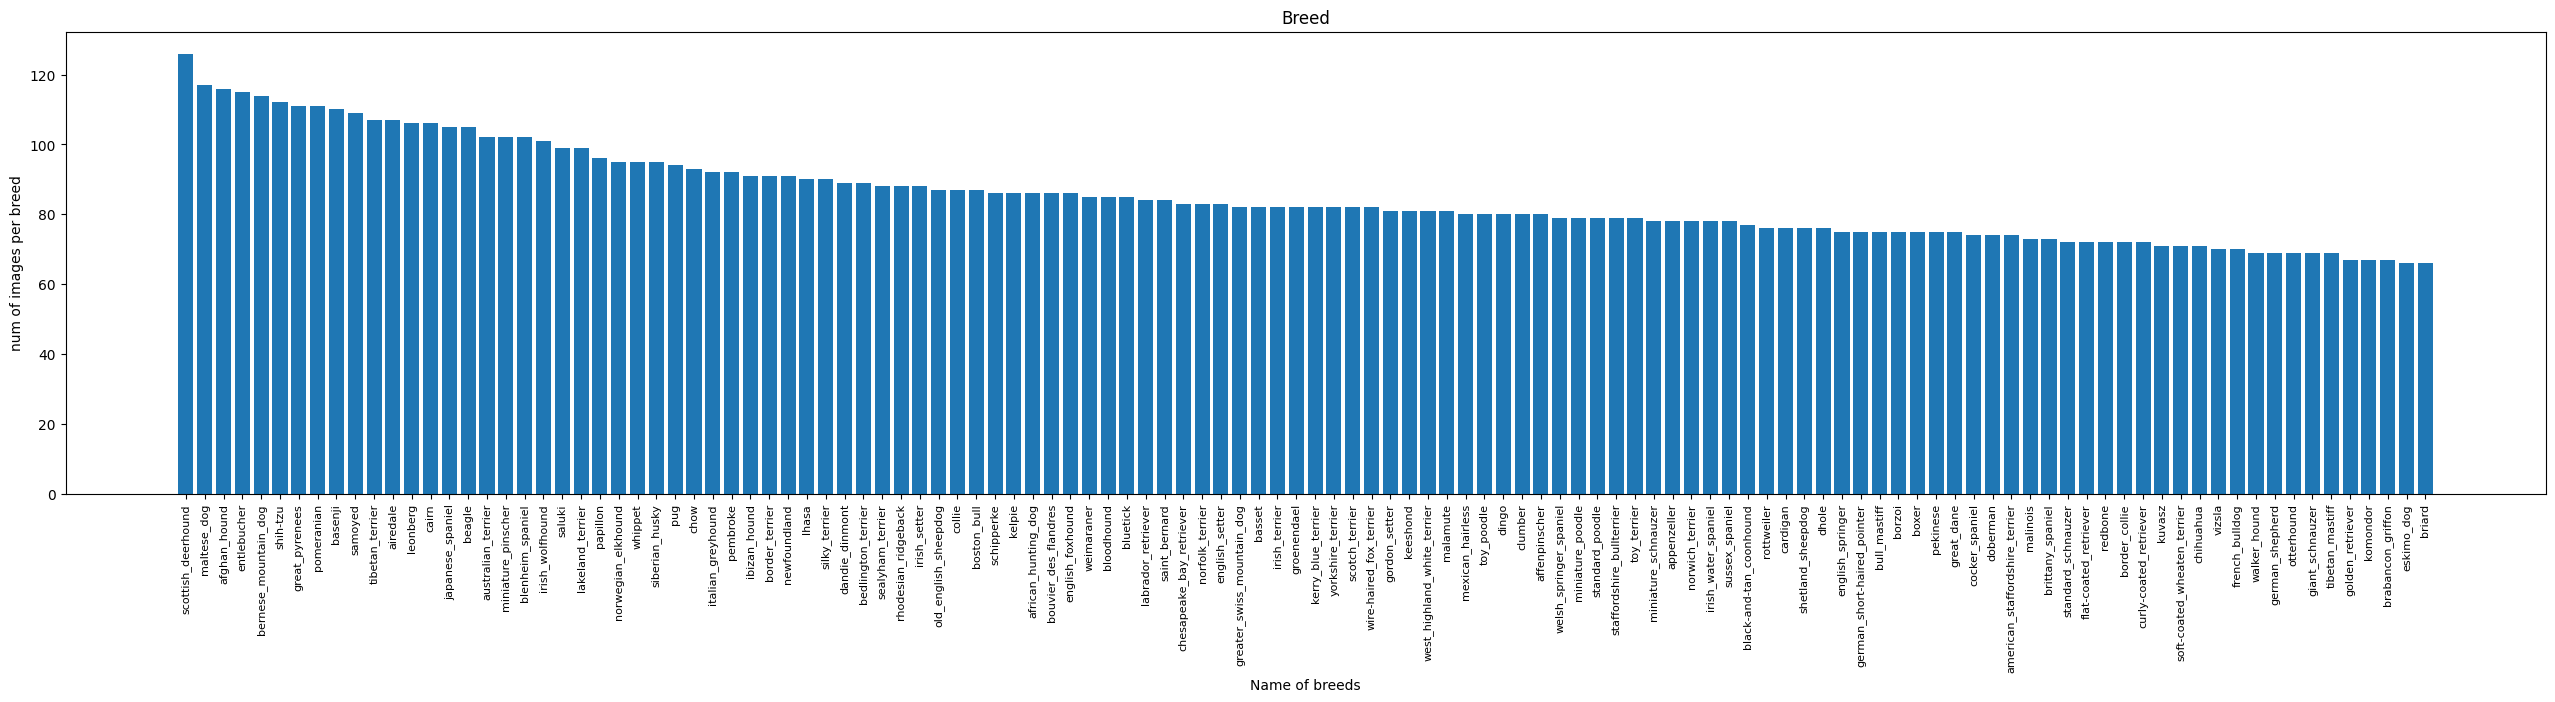

In [23]:
categories = counts.index
values = counts.values
plt.figure(figsize=(32, 6))
plt.bar(categories,values, width=0.8)
plt.title("Breed")
plt.xlabel("Name of breeds")
plt.ylabel("num of images per breed")
plt.xticks(rotation=90, fontsize=8)               # rotate labels so you can read them

plt.show()

In [32]:
import os
print(os.getcwd())  # see where the notebook is
print(os.listdir("../datasets/dog-breed-identification"))
os.path.exists("../datasets/dog-breed-identification/train/25be8d40afc2702a73cef09dd624a3f0.jpg")


/home/sepideh/workspace/dog-breed-identification/notebooks
['sample_submission.csv', 'train', 'labels.csv', 'test']


True

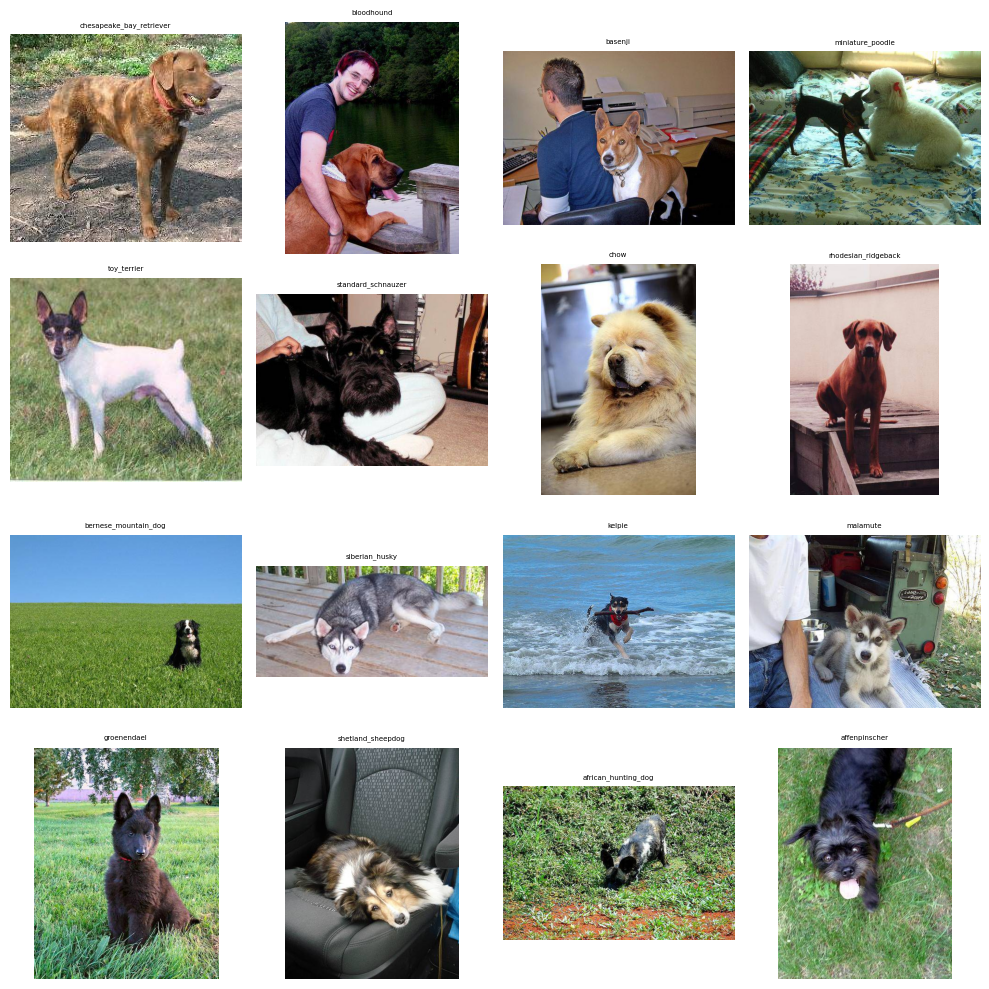

In [45]:
from PIL import Image
import os
samples = df.sample(16)
images_dir = "../datasets/dog-breed-identification/train/"

plt.figure(figsize=(10,10))

for i, (_,row) in enumerate(samples.iterrows(),1):
    img_path = os.path.join(images_dir, row["id"] + ".jpg")

    img = Image.open(img_path)
    plt.subplot(4, 4, i)
    plt.imshow(img)
    plt.axis("off")
    plt.title(row["breed"], fontsize=5)

plt.tight_layout()
plt.show()


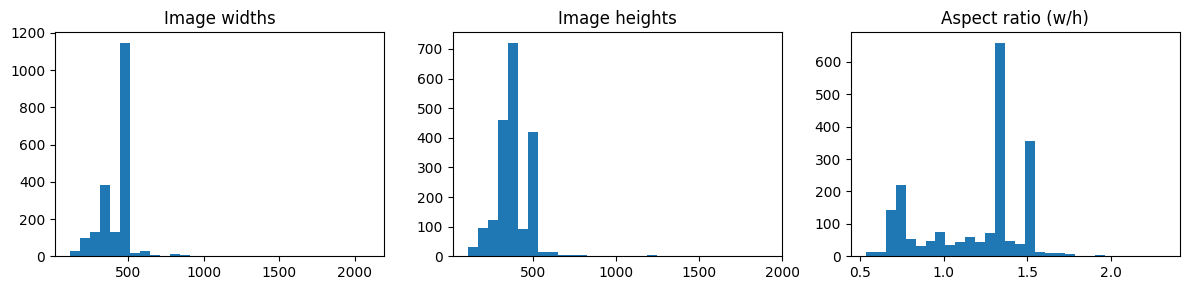

In [48]:
widths, heights, ratios = [], [], []

for img_id in df["id"].head(2000):
    img = Image.open(os.path.join(images_dir, img_id+".jpg"))
    w, h = img.size
    widths.append(w)
    heights.append(h)
    ratios.append(w / h)

plt.figure(figsize=(12,3))
plt.subplot(1, 3, 1)
plt.hist(widths, bins=30)
plt.title("Image widths")

plt.subplot(1, 3, 2)
plt.hist(heights, bins=30)
plt.title("Image heights")


plt.subplot(1, 3, 3)
plt.hist(ratios, bins=30)
plt.title("Aspect ratio (w/h)")

plt.tight_layout()
plt.show()
